# AIN 214 - PA4 - 2023
## Building kNN and Logistic Regression Classifiers


# THE STUDENT INFO
## Student Name: Süleyman Yolcu
## Student ID: 2210765016

# Dataset: We will use the Breast Cancer Wisconsin (Diagnostic) Dataset available on Kaggle for the assignment. 
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## 1. Data Preprocessing

In this section, you will:
- Import necessary libraries
- Load the dataset
- Handle missing values and outliers
- Convert non-numeric values to numeric 
- Perform data normalization

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc

# Load the dataset
path_to_dataset = 'data.csv'
df = pd.read_csv(path_to_dataset)

In [2]:
df = df.drop("Unnamed: 32", axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Outlier handling

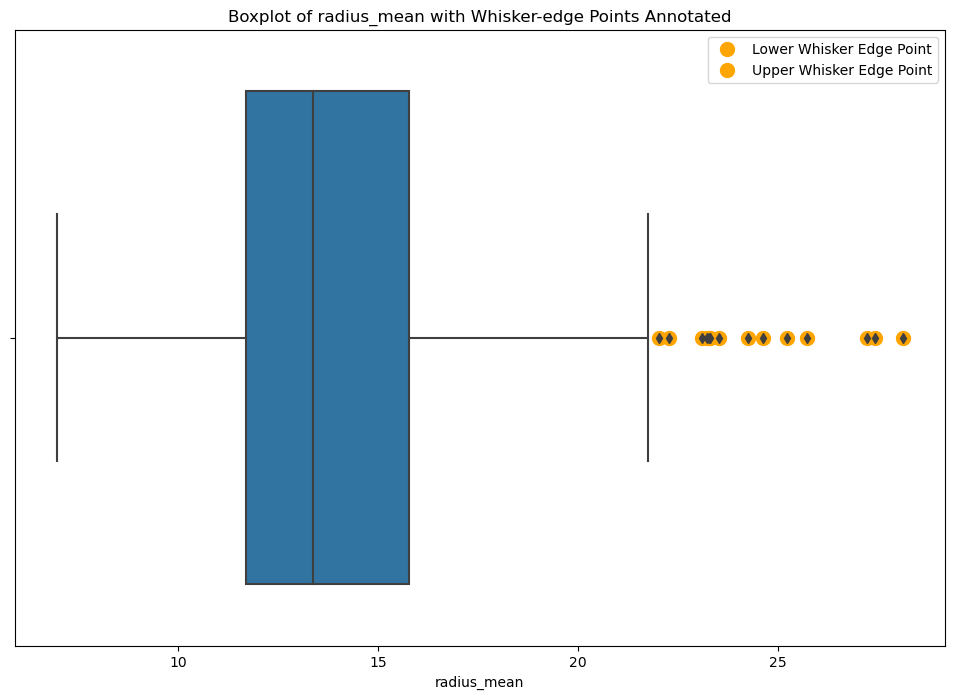

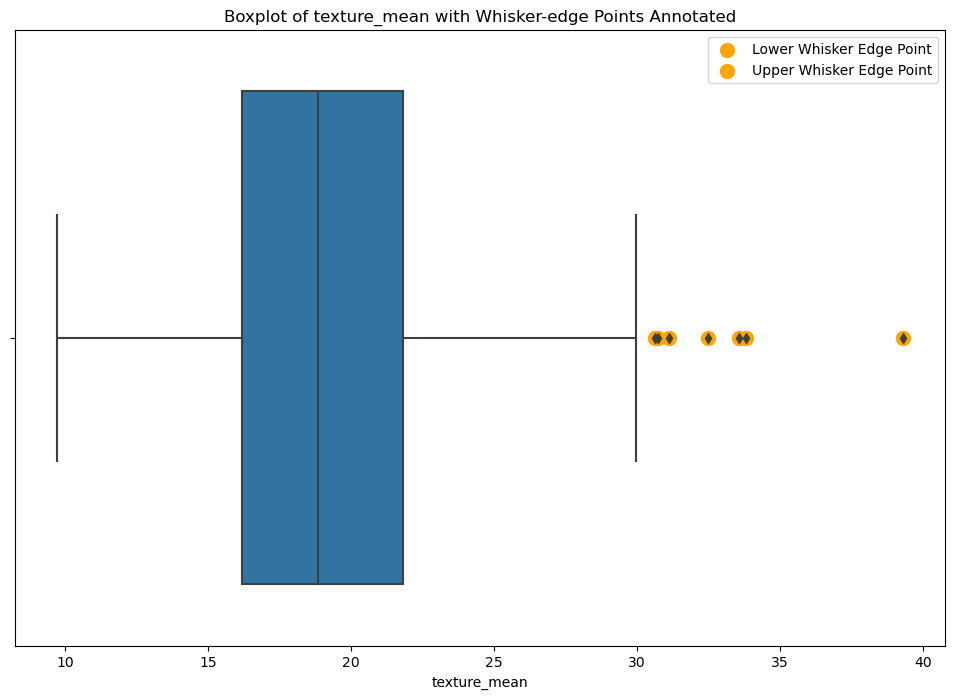

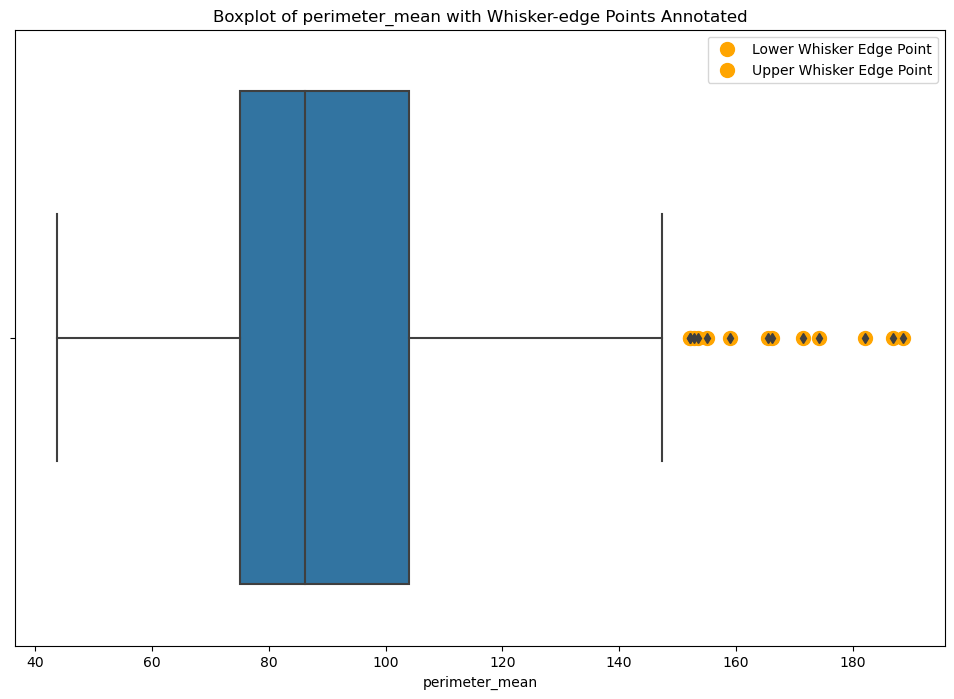

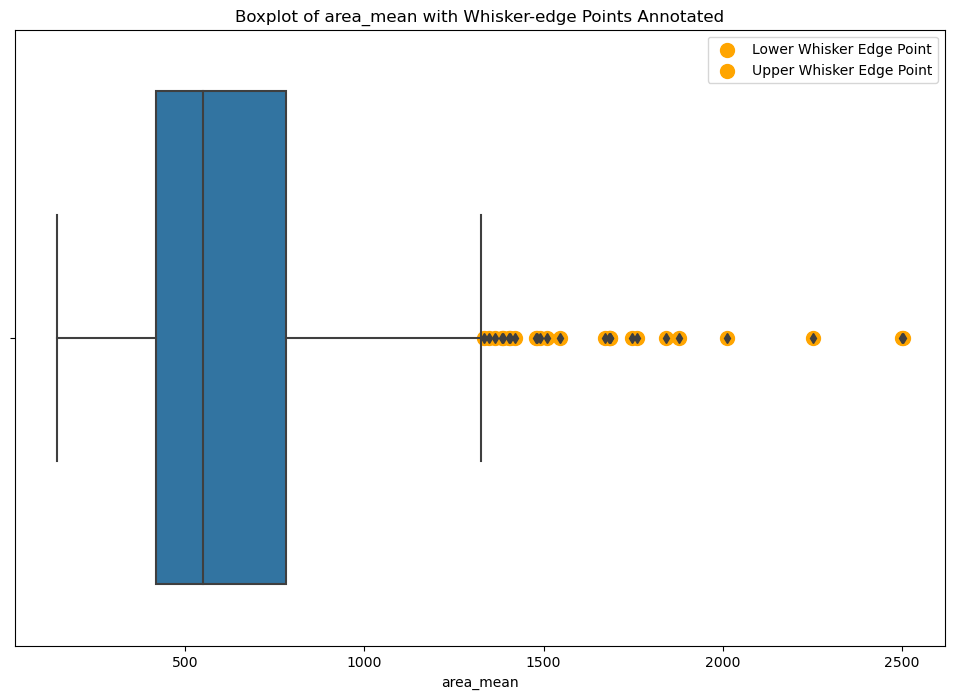

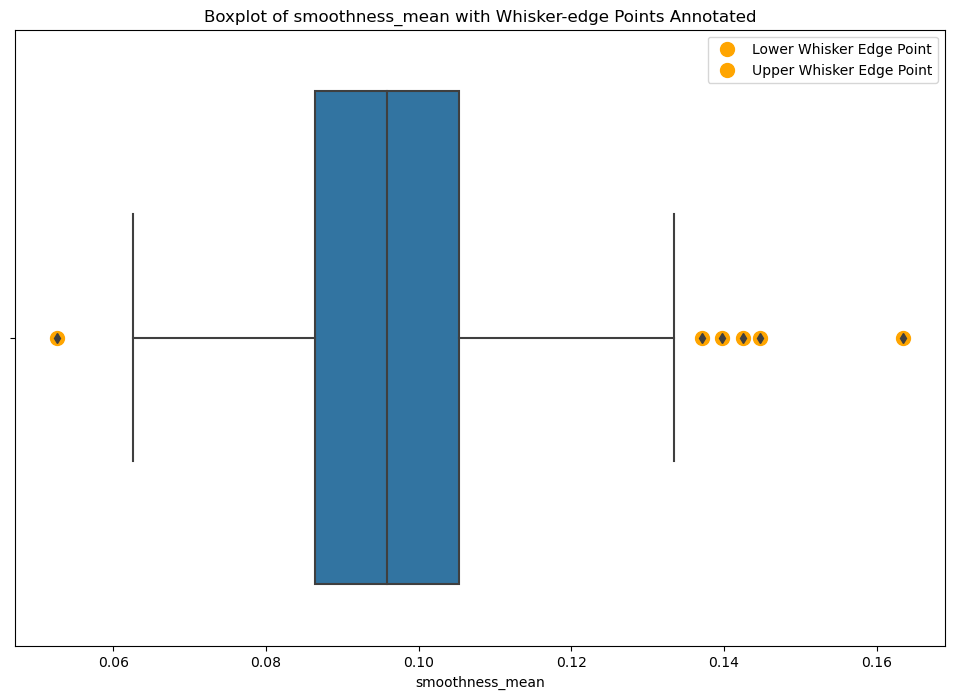

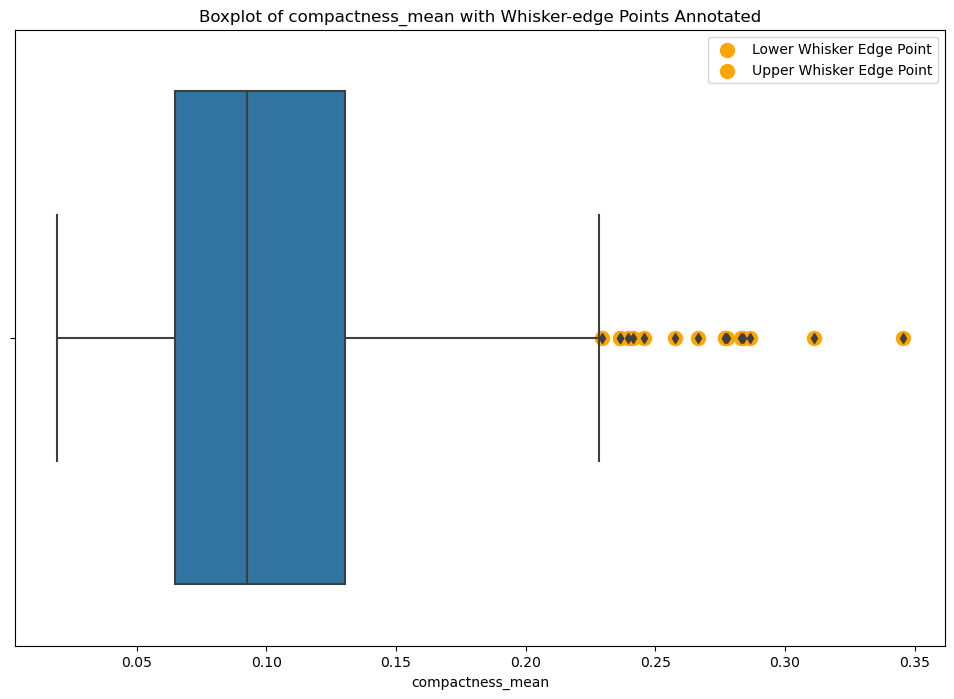

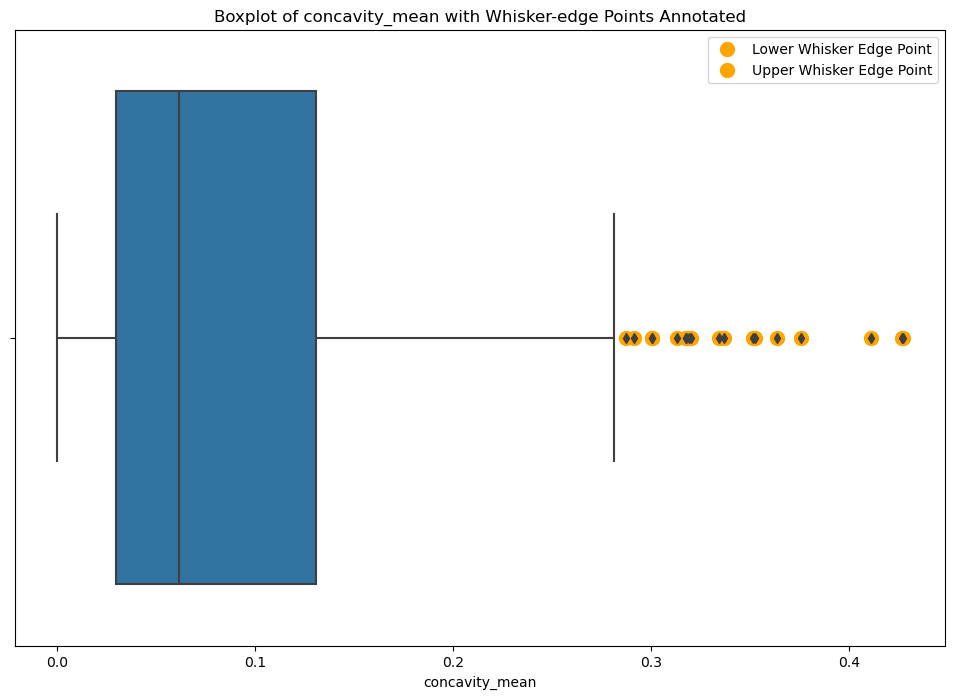

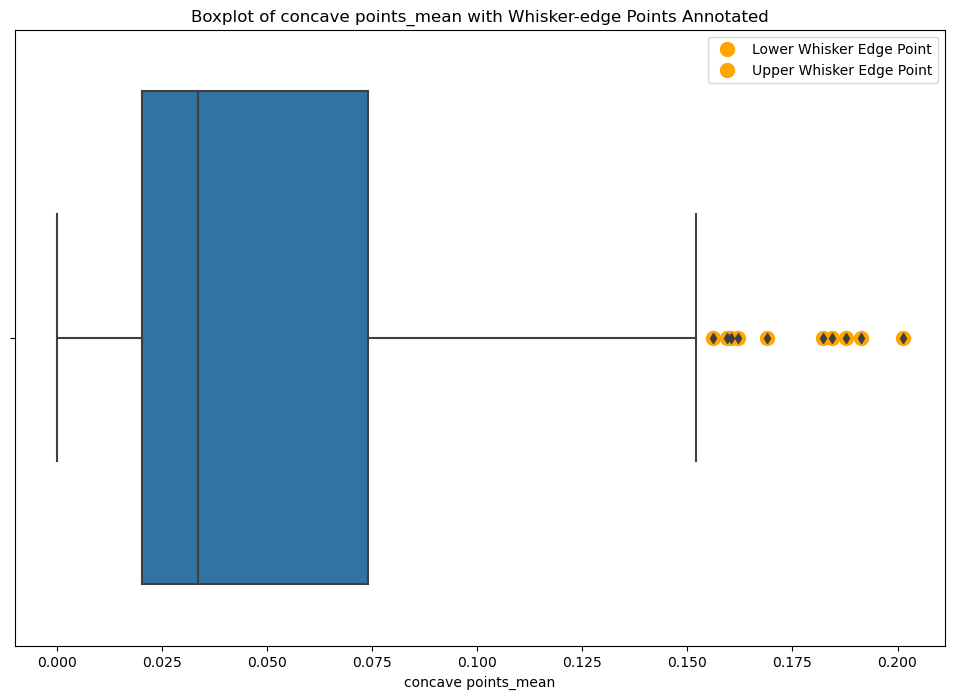

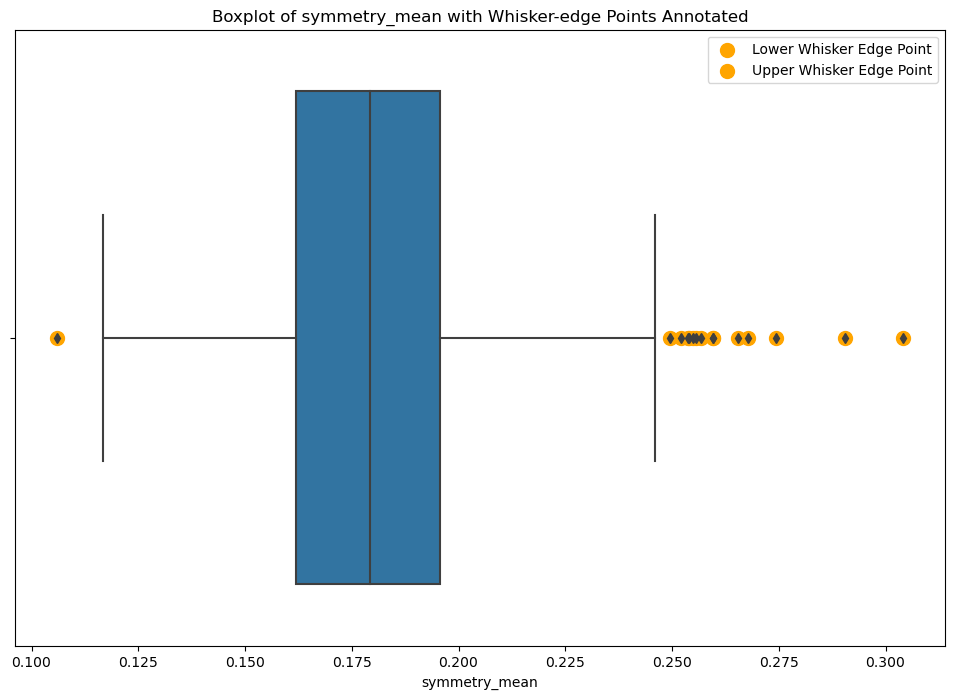

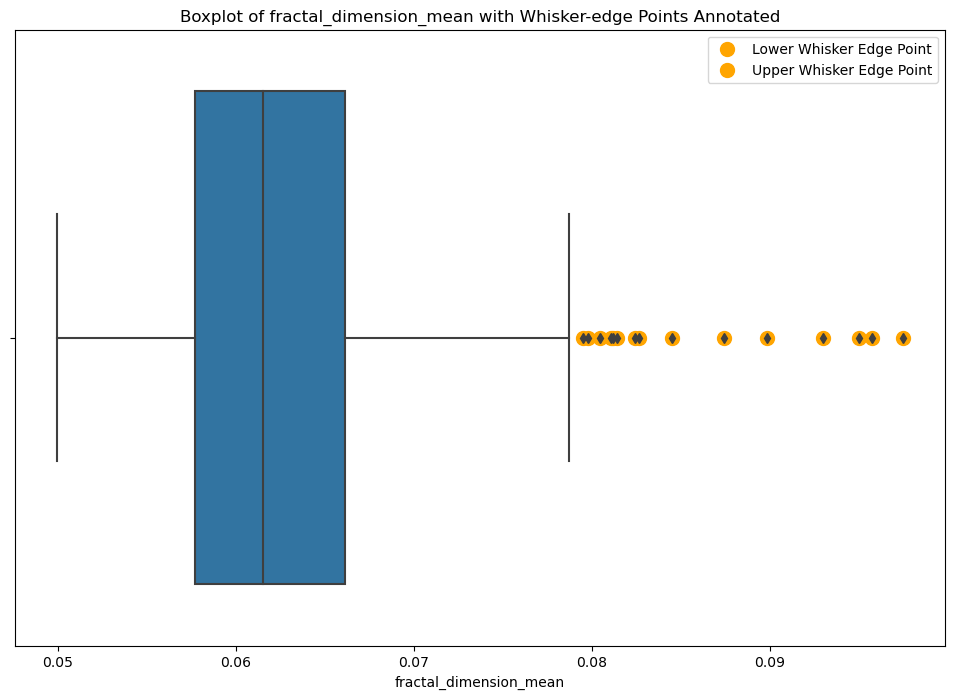

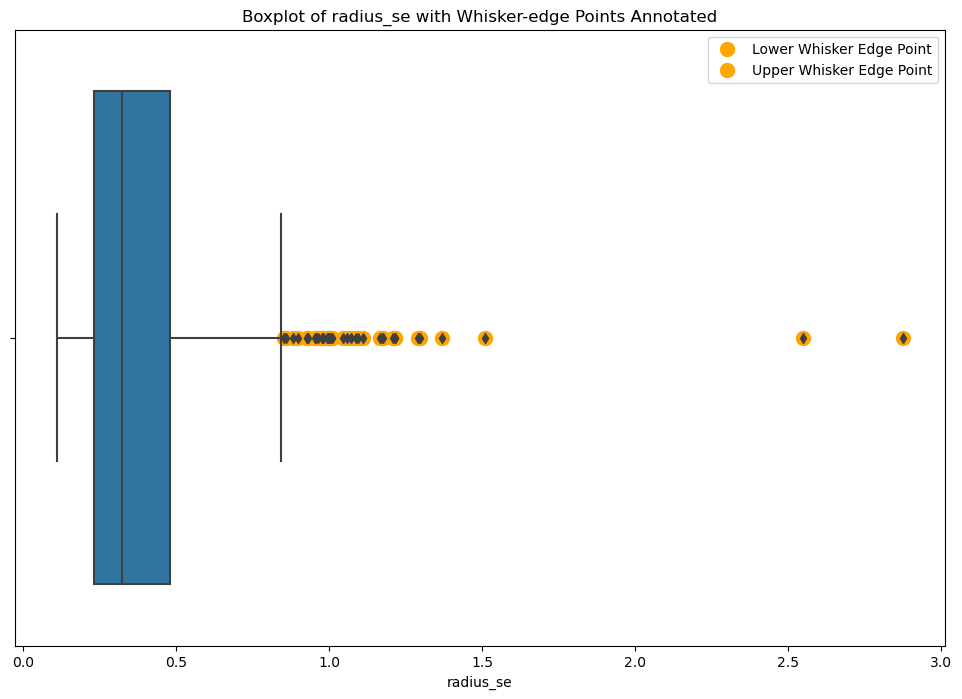

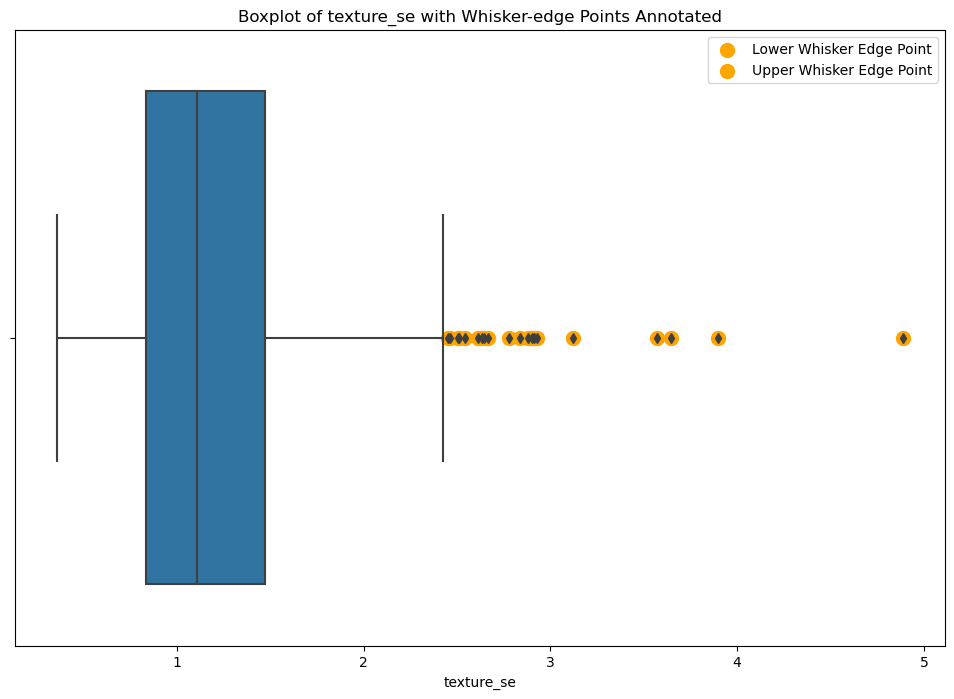

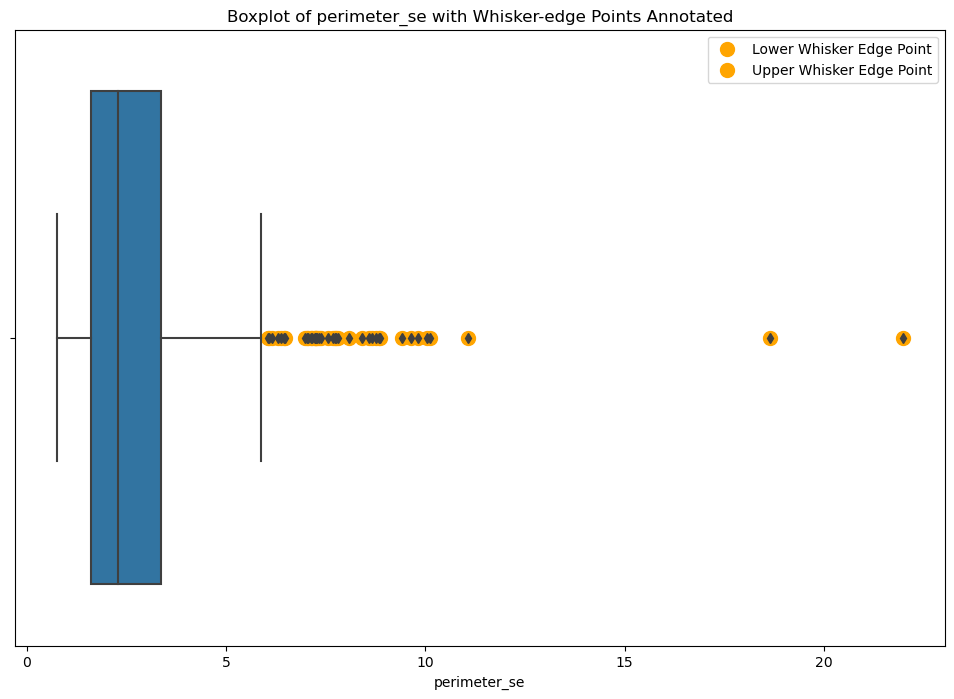

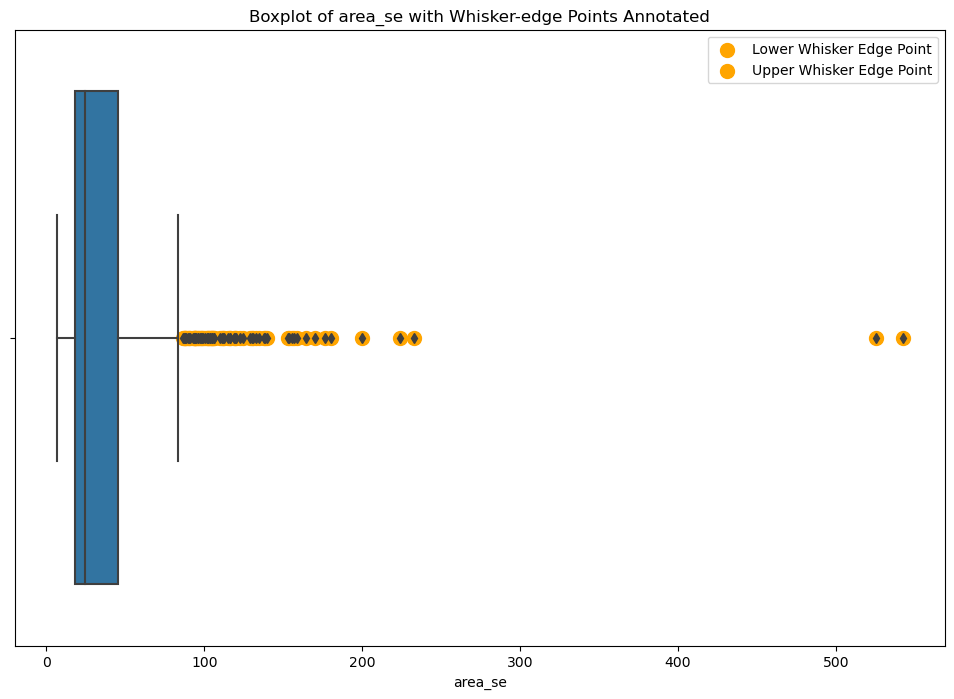

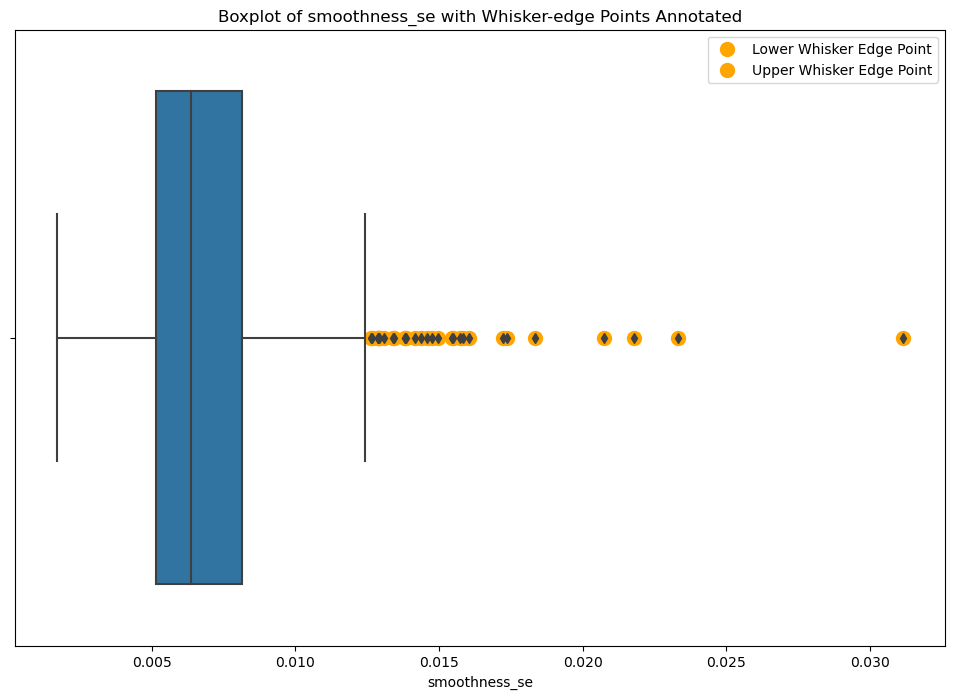

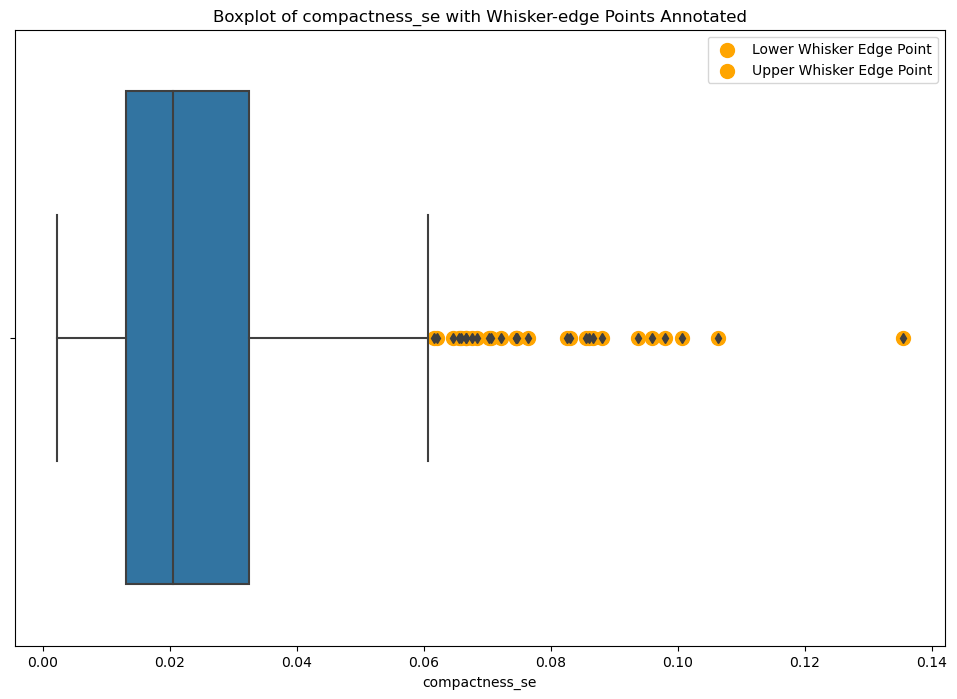

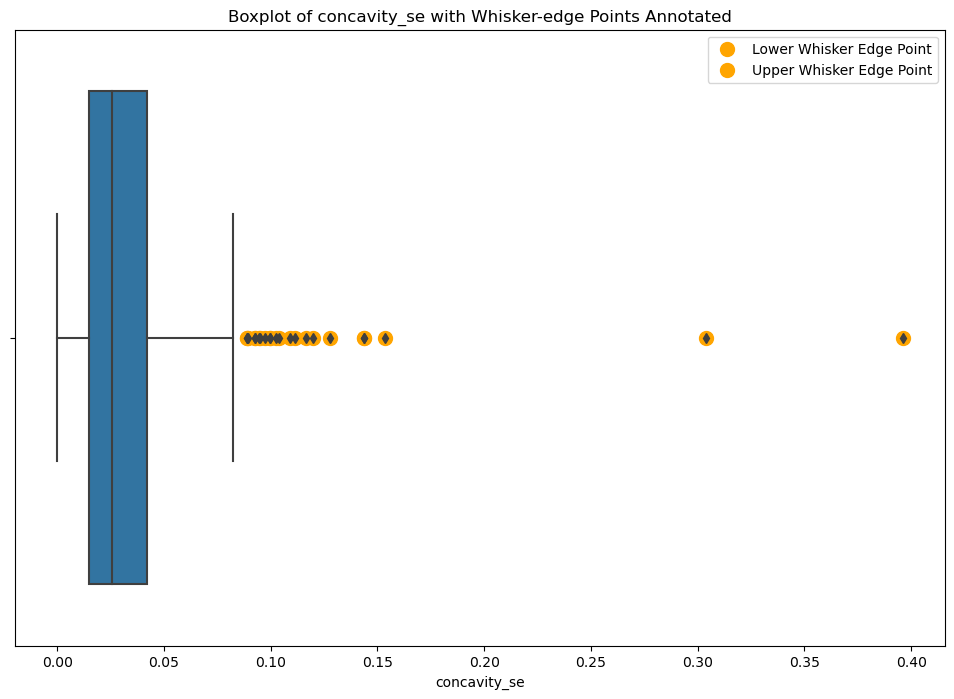

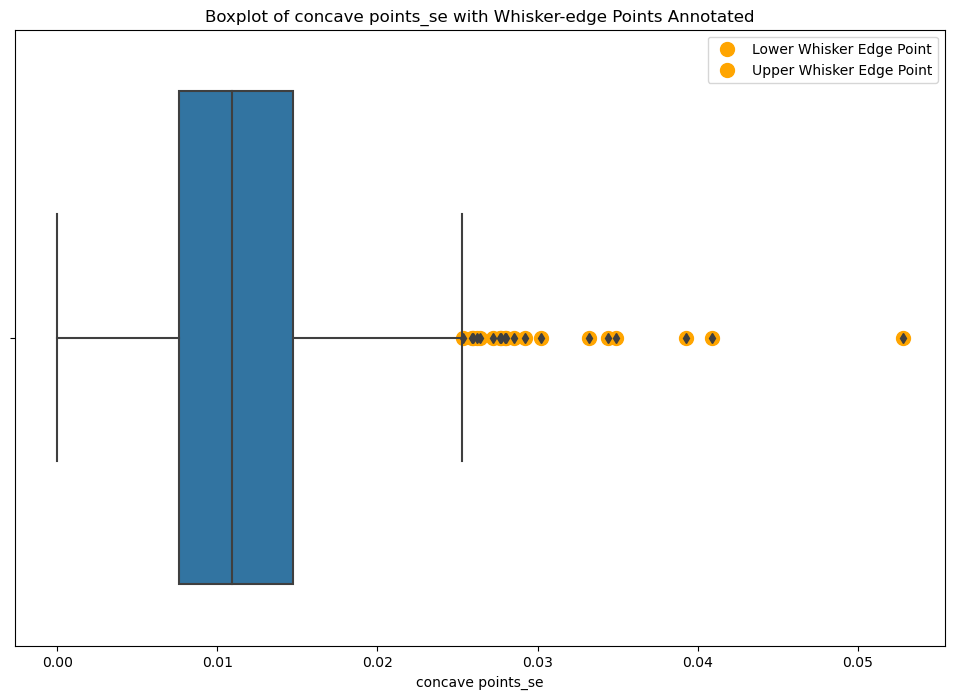

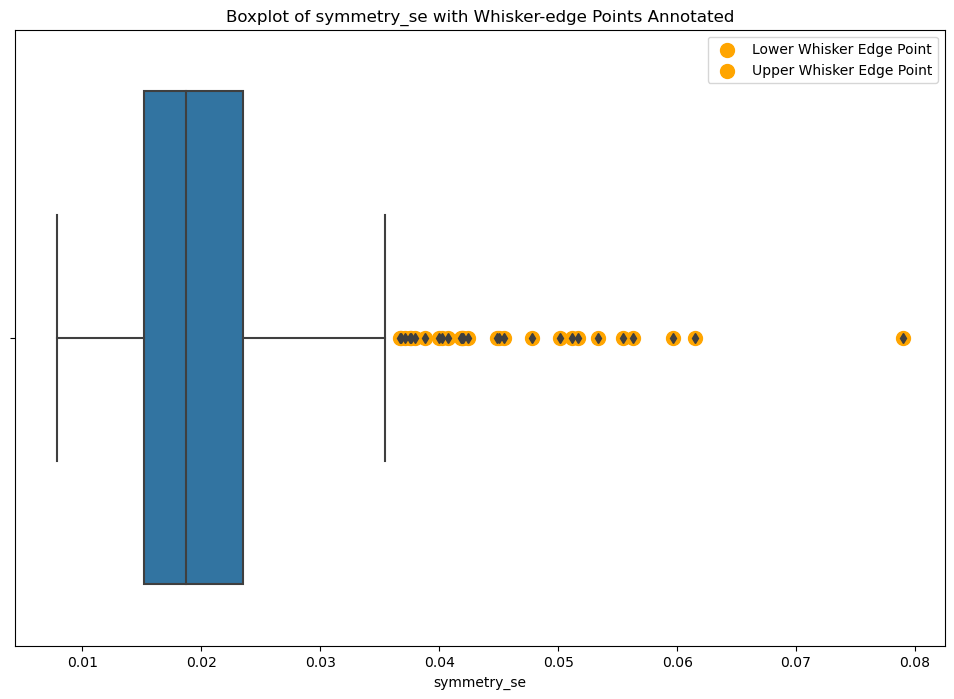

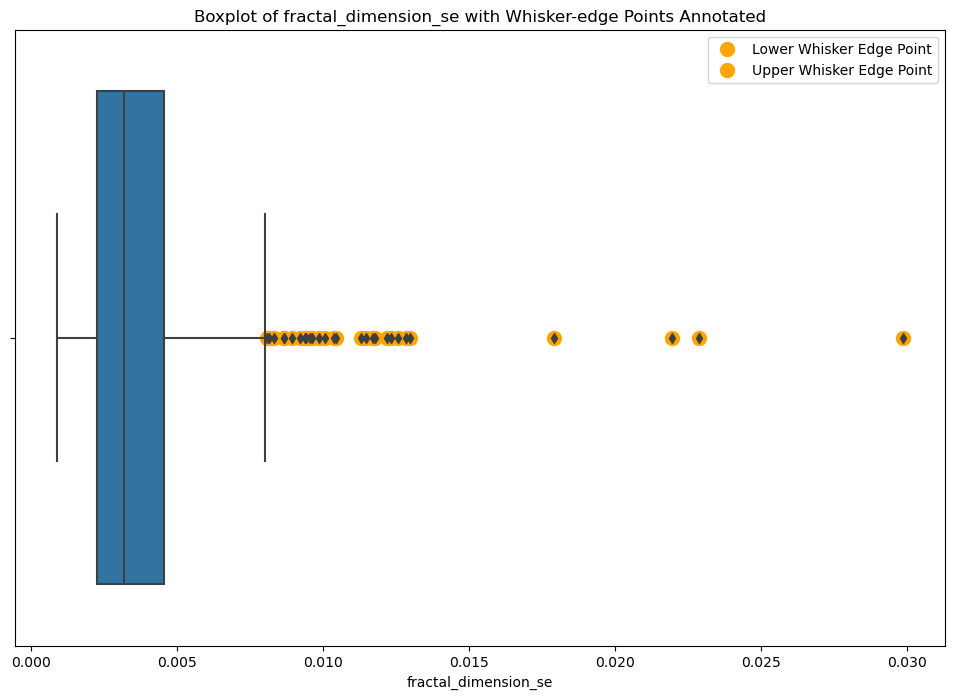

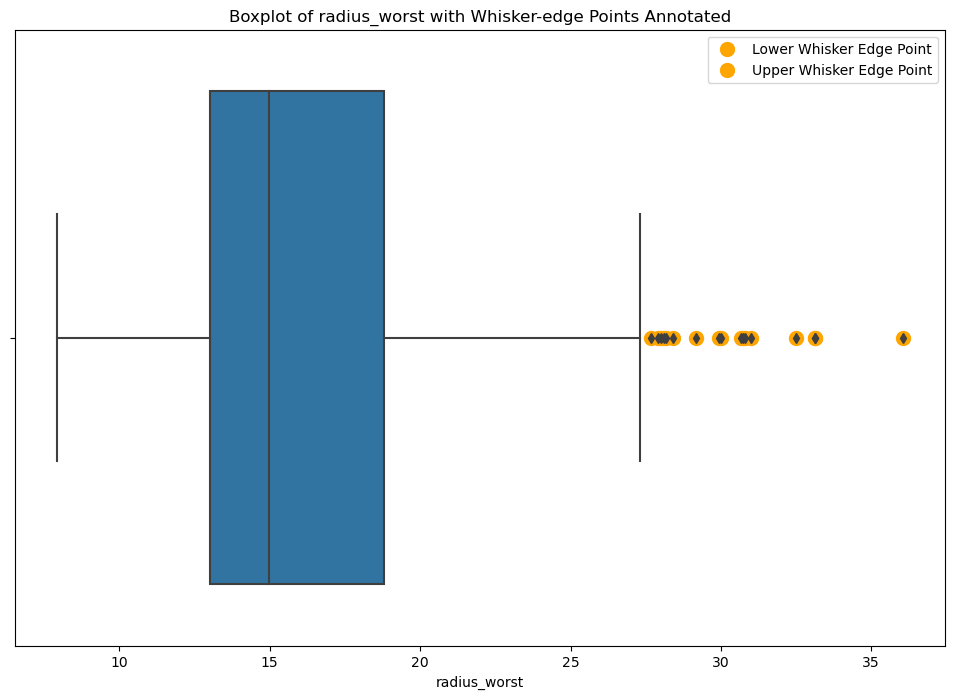

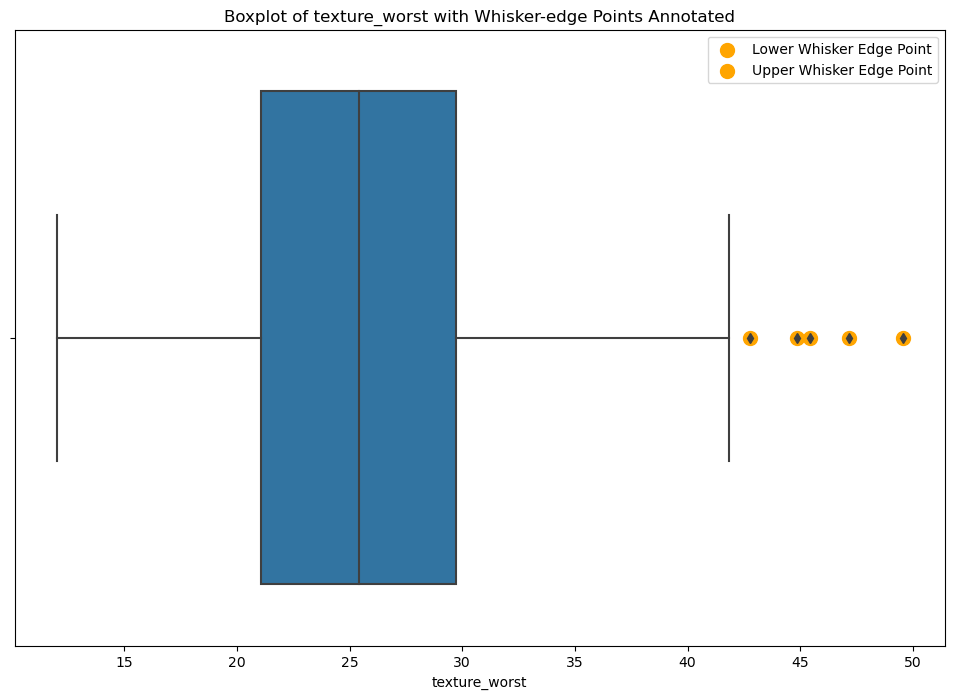

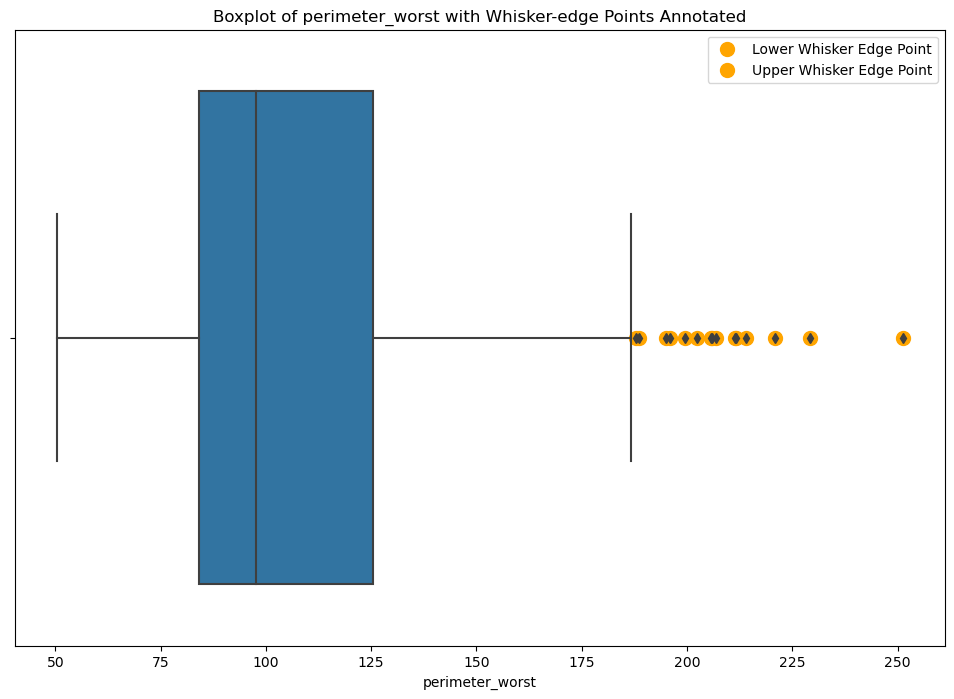

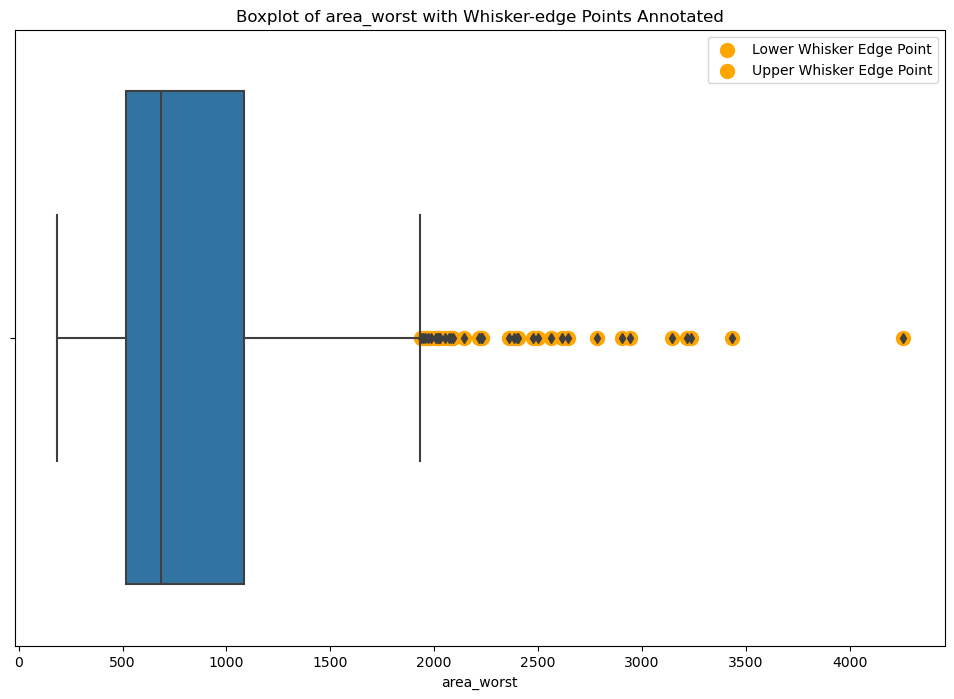

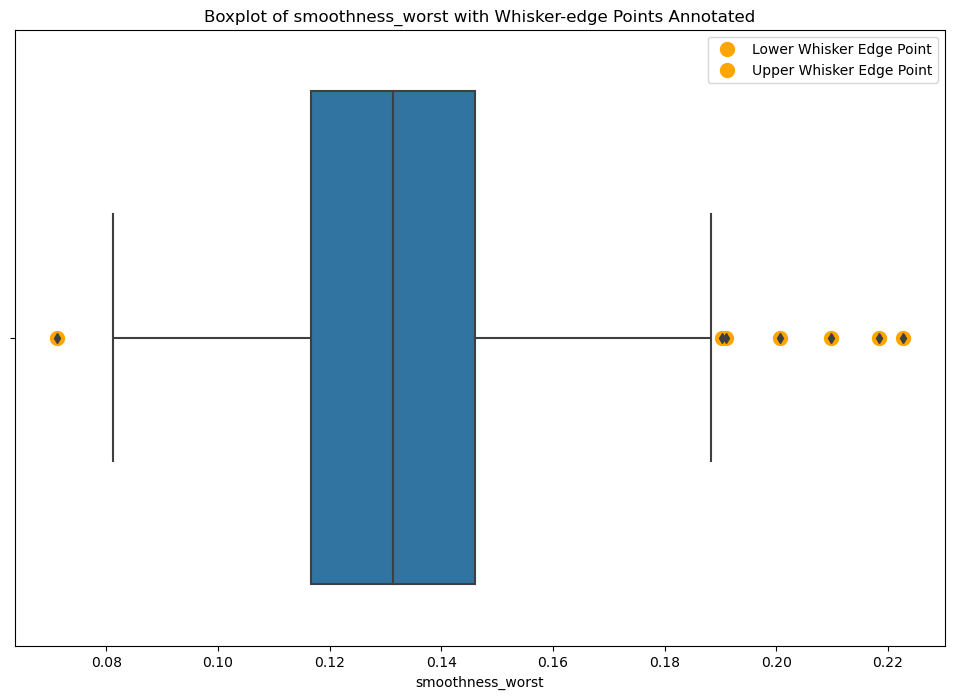

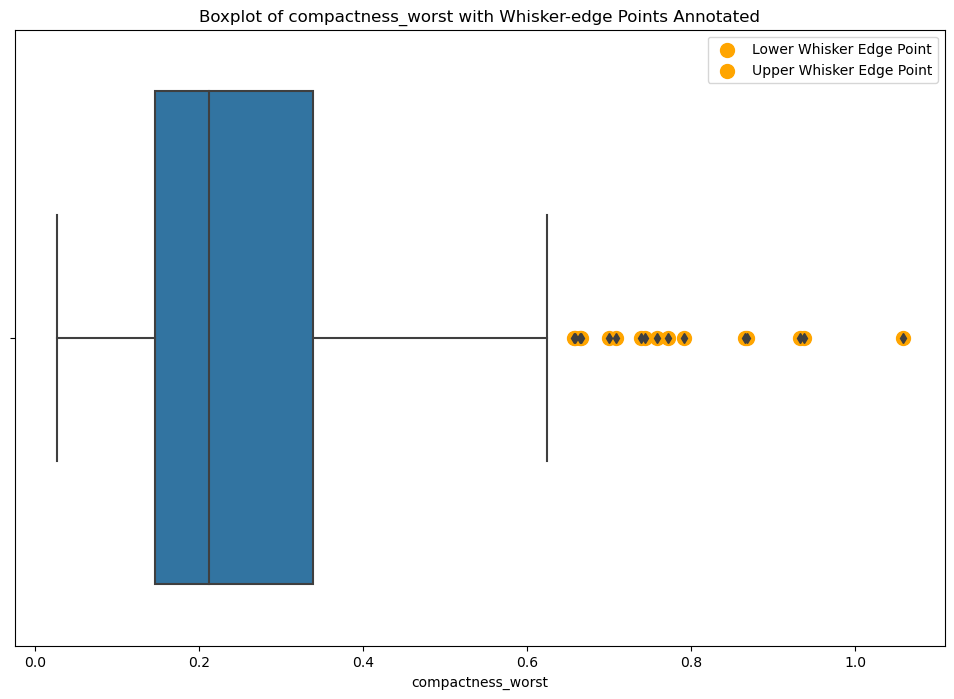

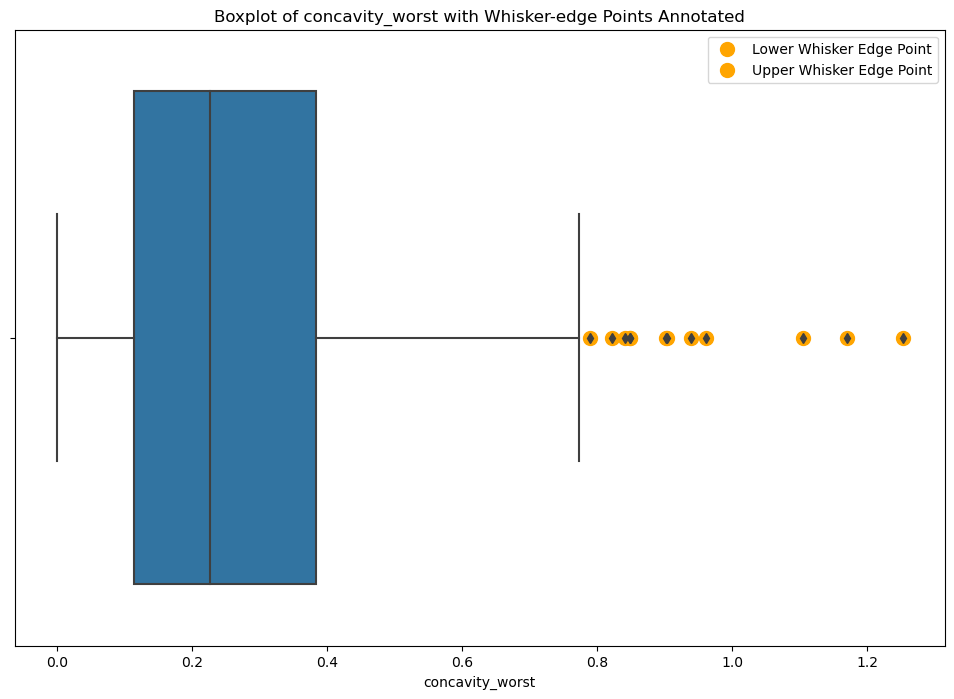

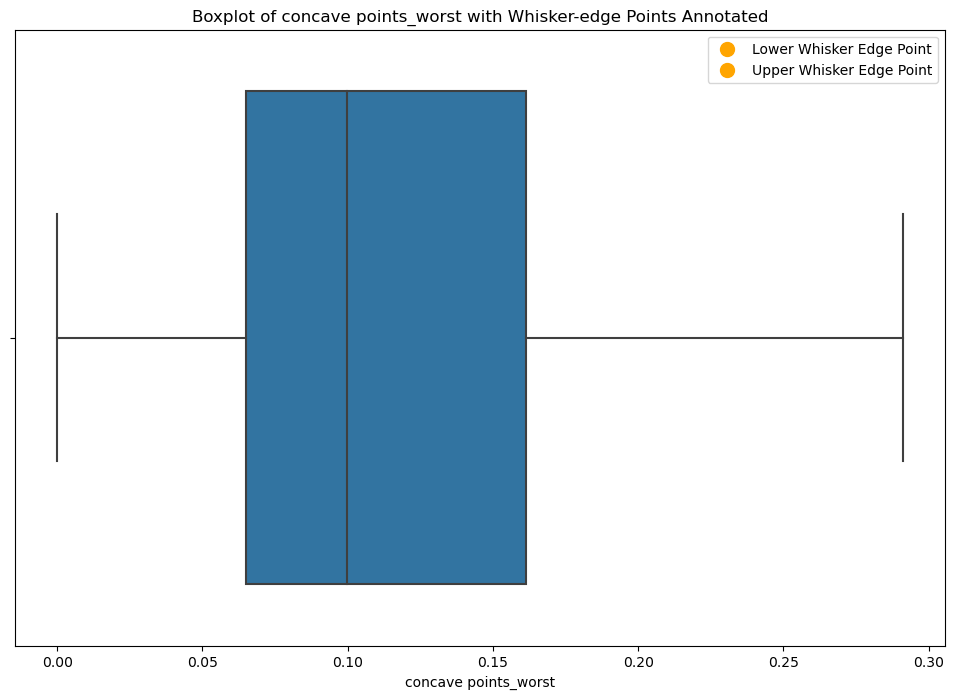

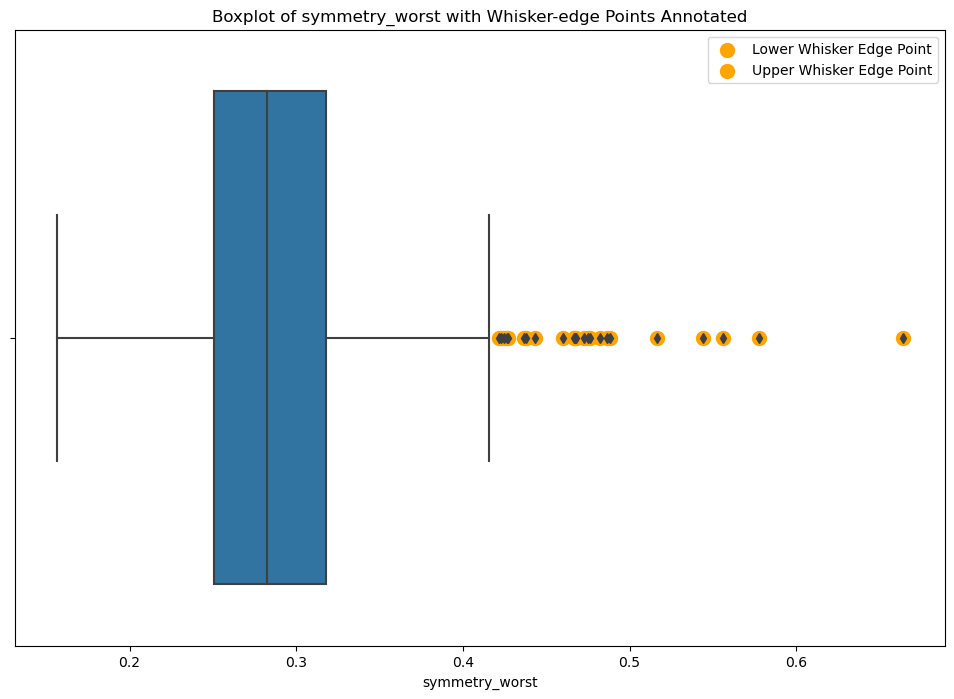

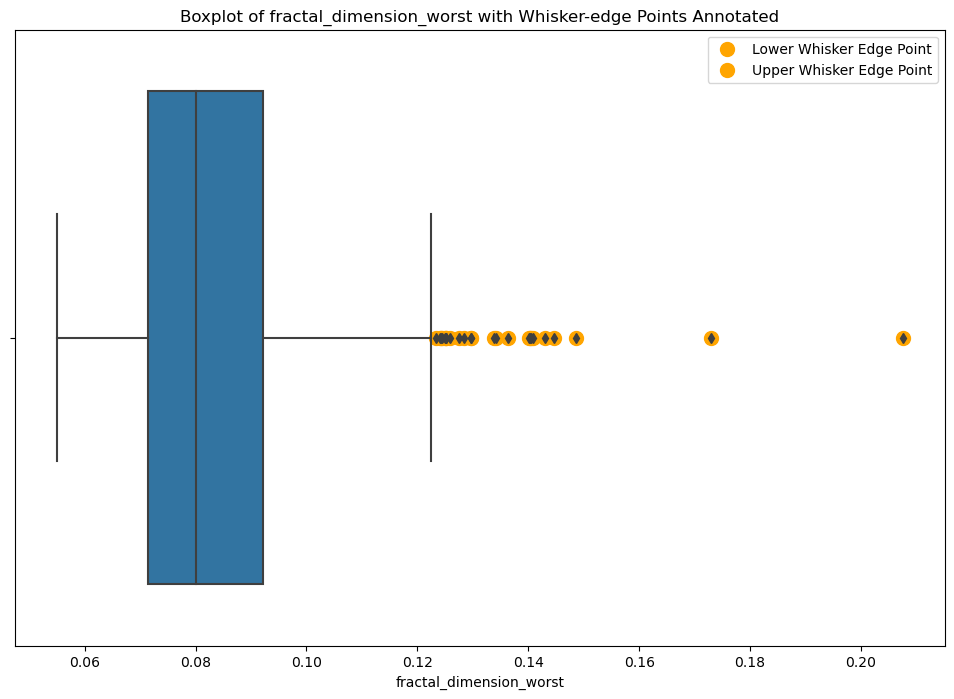

In [4]:
numeric_features = df.select_dtypes(include=np.float64)

# Calculate quartiles and IQR for each numerical feature
Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for defining outliers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Initialize an empty list to store outlier information
outlier_info = []

# Iterate through numerical features to identify and store outliers
for feature in numeric_features.columns:
    lower_whisker_point = df[df[feature] < lower_whisker[feature]][feature]
    upper_whisker_point = df[df[feature] > upper_whisker[feature]][feature]
    outliers = pd.concat([lower_whisker_point, upper_whisker_point])

    # Append outlier information as a dictionary to the list
    outlier_info.append({'Feature': feature, 'Lower_Whisker': lower_whisker[feature],
                         'Upper_Whisker': upper_whisker[feature], 'Outliers': outliers.tolist()})

    # Create a boxplot for each feature with whisker-edge points annotated
    plt.figure(figsize=(12, 8))
    boxplot = sns.boxplot(x=df[feature], whis=1.5)
    plt.scatter(lower_whisker_point, [0] * len(lower_whisker_point), color='orange', s=100, label='Lower Whisker Edge Point')
    plt.scatter(upper_whisker_point, [0] * len(upper_whisker_point), color='orange', s=100, label='Upper Whisker Edge Point')
    plt.legend()
    plt.title(f'Boxplot of {feature} with Whisker-edge Points Annotated')
    plt.xlabel(feature)
    plt.show()

# Convert the list of dictionaries to a DataFrame
outlier_info = pd.DataFrame(outlier_info)


###  Table for the outliers

In [5]:
outlier_info['Total Outlier Number '] = outlier_info['Outliers'].apply(lambda x: len(x))
display(outlier_info)

,Feature,Lower_Whisker,Upper_Whisker,Outliers,Total Outlier Number
0,radius_mean,5.580000,21.900000,"[25.22, 22.27, 24.25, 23.27, 27.22, 23.29, 28....",14
1,texture_mean,7.725000,30.245000,"[32.47, 33.81, 39.28, 33.56, 31.12, 30.72, 30.62]",7
2,perimeter_mean,31.775000,147.495000,"[171.5, 152.8, 166.2, 152.1, 182.1, 158.9, 188...",13
3,area_mean,-123.300000,1326.300000,"[1404.0, 1878.0, 1509.0, 1761.0, 1686.0, 2250....",25
4,smoothness_mean,0.057975,0.133695,"[0.05263, 0.1425, 0.1398, 0.1447, 0.1634, 0.1371]",6
5,compactness_mean,-0.033300,0.228620,"[0.2776, 0.2839, 0.2396, 0.2458, 0.2293, 0.345...",16
6,concavity_mean,-0.122150,0.282410,"[0.3001, 0.313, 0.3754, 0.3339, 0.4264, 0.3003...",18
7,concave points_mean,-0.060225,0.154535,"[0.1604, 0.1845, 0.1823, 0.2012, 0.1878, 0.162...",10
8,symmetry_mean,0.111200,0.246400,"[0.106, 0.2597, 0.2521, 0.304, 0.2743, 0.2906,...",15
9,fractal_dimension_mean,0.045070,0.078750,"[0.09744, 0.08243, 0.08046, 0.0898, 0.08142, 0...",15


### Mean imputation

In [6]:
for feature in numeric_features:
    outliers = outlier_info[outlier_info['Feature'] == feature]['Outliers'].values[0]
    mean_value = df[feature].mean()
    df.loc[df[feature].isin(outliers), feature] = mean_value

- I choose mean imputation because the data is numerical and not heavily skewed and for some features it is approximately normally distributed. 

### Encoding

In [7]:
ordinal_encoder = OrdinalEncoder()
df[df.select_dtypes(include=['object']).columns] = ordinal_encoder.fit_transform(df.select_dtypes(include=['object']))

### Normalization

In [22]:
numeric_features = df.select_dtypes(include=np.float64)
scaler = MinMaxScaler()
df[numeric_features.columns] = scaler.fit_transform(df[numeric_features.columns])

## 2. Data Visualization

Visualize the data to understand it better:
- Correlation heatmap
- Distribution plots for at least 3 features


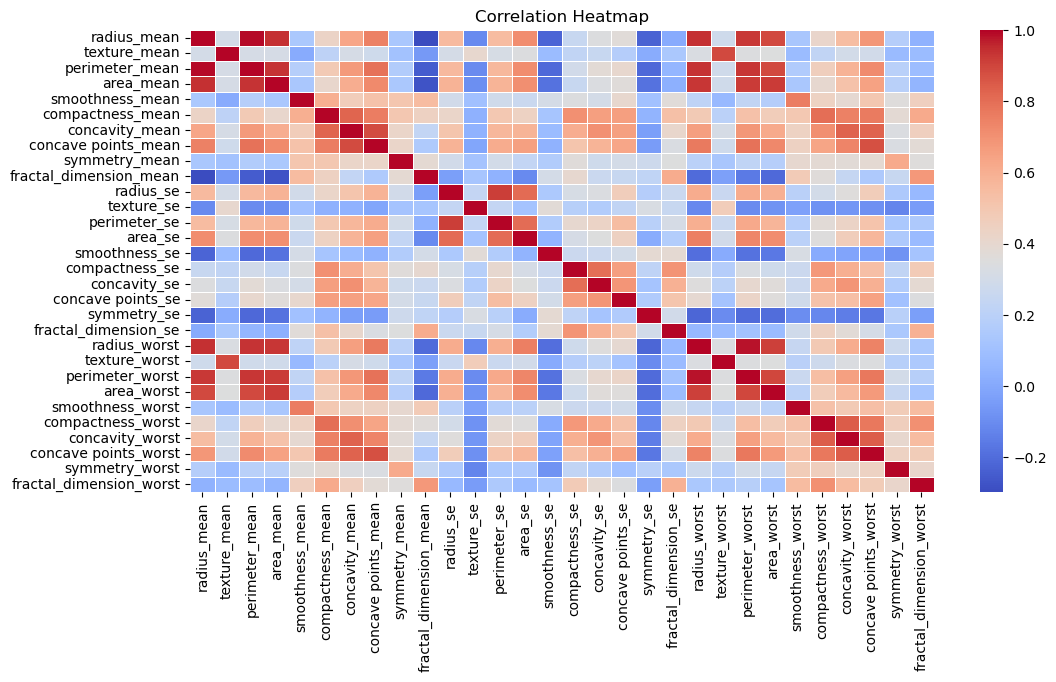

In [24]:
# Create a new DataFrame excluding some columns
df_excluded = df.drop(columns=['id','diagnosis'])

# Create a correlation matrix for the new DataFrame
correlation_matrix = df_excluded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- We can see that radius_worst has correlated with radius_mean perimeter_mean and area_mean.
- We can also see that compactness_worst , concavity_worst and concave points_worst are correlated.

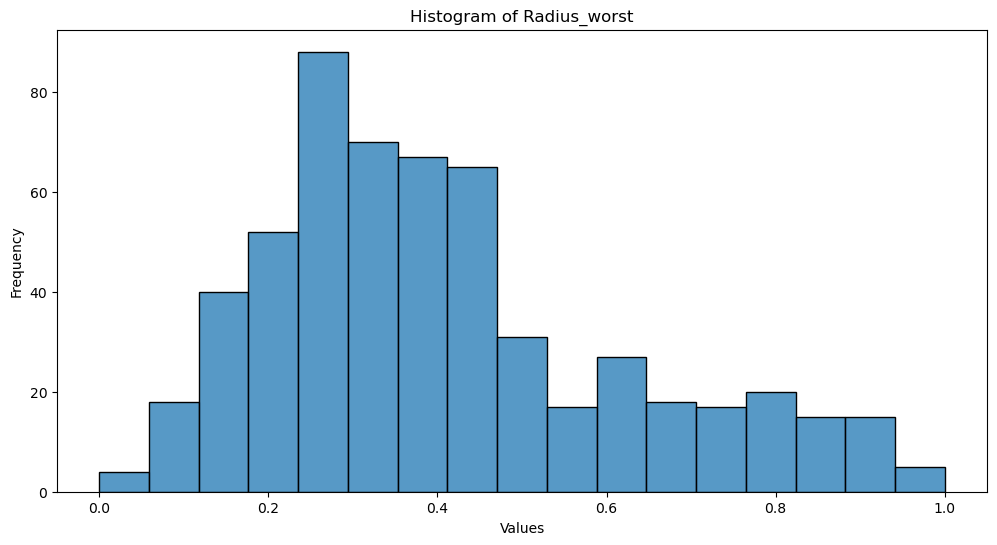

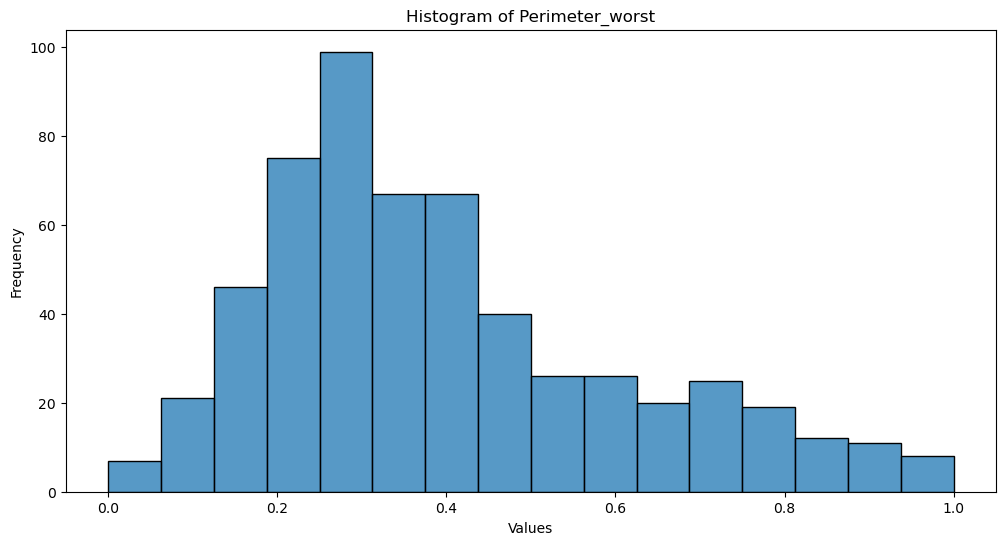

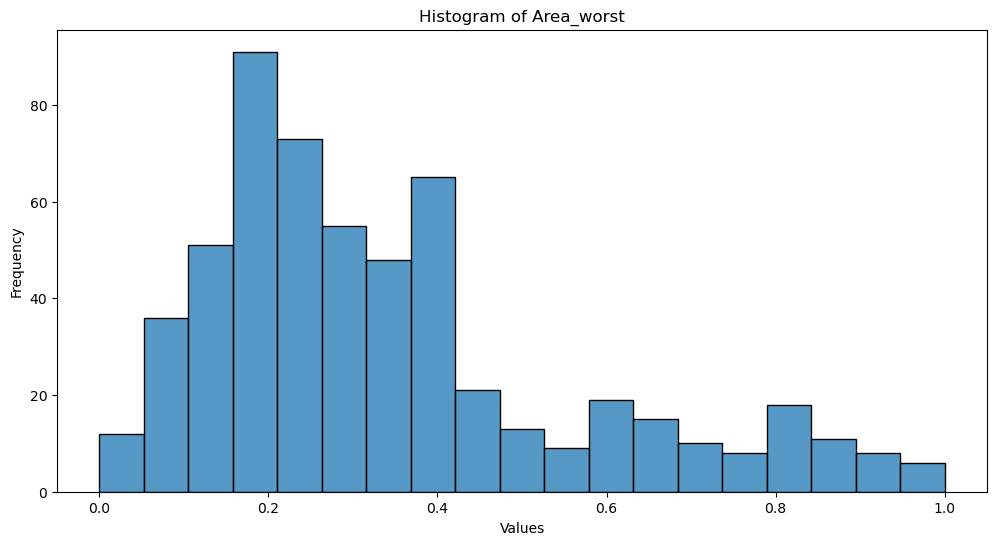

In [10]:
def plot_distribution(df):
    columns_to_plot = df[['radius_worst','perimeter_worst','area_worst']]

    for column in columns_to_plot.columns:
        plt.figure(figsize=(12, 6))
        sns.histplot(df[column])
        plt.title(f'Histogram of {column.capitalize()}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.show()
plot_distribution(df)

- We clearly see that these three features are a little right-skewed

## 3. Data Splitting

Manually split the data into training and testing sets in a 70:30 ratio:
- Shuffle and split the data
- Avoid using predefined functions like train_test_split for this task


In [11]:
def shuffle_and_split(data, train_ratio=0.7):
    # Shuffle the DataFrame
    shuffled_data = data.sample(frac=1, random_state=20).reset_index(drop=True)
    
    # Calculate the number of rows for training set
    train_size = int(train_ratio * len(shuffled_data))
    
    # Split the dataset into training and testing sets
    train_set = shuffled_data[:train_size]
    test_set = shuffled_data[train_size:]
    
    return train_set, test_set

## 4. Model Building

### 4.1. kNN Classifier

- Build and train the kNN model
- Choose the optimal k value using Minkowski distance with at least two different values for p 

In [31]:
train_df, test_df = shuffle_and_split(df)
# Exclude 'id' column from features
X_train, y_train = np.array(train_df.drop(['id', 'diagnosis'], axis=1)), np.array(train_df['diagnosis'])
X_test, y_test = np.array(test_df.drop(['id', 'diagnosis'], axis=1)), np.array(test_df['diagnosis'])
# Define a range of k values to try
k_values = [3, 5, 7, 9]

# Define a range of p values for Minkowski distance
p_values = [1, 2]  # Corresponding to Manhattan (p=1) and Euclidean (p=2) distances

# Initialize variables to store best parameters and accuracy
best_k = 0
best_p = 0
best_f1 = 0

# Iterate over k and p values to find the optimal combination
for k in k_values:
    for p in p_values:
        # Create kNN classifier with the current k and p values
        knn_classifier = KNeighborsClassifier(n_neighbors=k, p=p)
        
        # Train the model
        knn_classifier.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = knn_classifier.predict(X_test)
        
        # Calculate accuracy
        f1 = f1_score(y_test, y_pred)
        
        # Check if the current combination gives a higher accuracy
        if f1 > best_f1:
            best_f1 = f1
            best_k = k
            best_p = p
        print(f" The F1 score for k : {k} and for p : {p} : {f1}")

# Print the best parameters and accuracy
print(f"Best k value: {best_k}")
print(f"Best p value: {best_p}")
print(f"F1 with best parameters: {best_f1:.2f}")

 The F1 score for k : 3 and for p : 1 : 0.953125
 The F1 score for k : 3 and for p : 2 : 0.9618320610687023
 The F1 score for k : 5 and for p : 1 : 0.9612403100775194
 The F1 score for k : 5 and for p : 2 : 0.9538461538461538
 The F1 score for k : 7 and for p : 1 : 0.9448818897637796
 The F1 score for k : 7 and for p : 2 : 0.9365079365079364
 The F1 score for k : 9 and for p : 1 : 0.9365079365079364
 The F1 score for k : 9 and for p : 2 : 0.9448818897637796
Best k value: 3
Best p value: 2
F1 with best parameters: 0.96


### 4.2. Logistic Regression

- Build and train the Logistic Regression model

In [13]:
train_df, test_df = shuffle_and_split(df)

# Convert features and labels to NumPy arrays
X_train, y_train = np.array(train_df.drop(['id', 'diagnosis'], axis=1)), np.array(train_df['diagnosis'])
X_test, y_test = np.array(test_df.drop(['id', 'diagnosis'], axis=1)), np.array(test_df['diagnosis'])

# Initialize Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Calculate accuracy
f1 = f1_score(y_test, y_pred)

# Print the accuracy
print(f"F1 Score of Logistic Regression: {f1:.2f}")

F1 Score of Logistic Regression: 0.94


## 5. Model Evaluation

### 5.1. Confusion Matrix

Analysis of the confusion matrices for both models:
- Plot and interpret the confusion matrices
- Display accuracy, precision, recall, and F1-score for both models

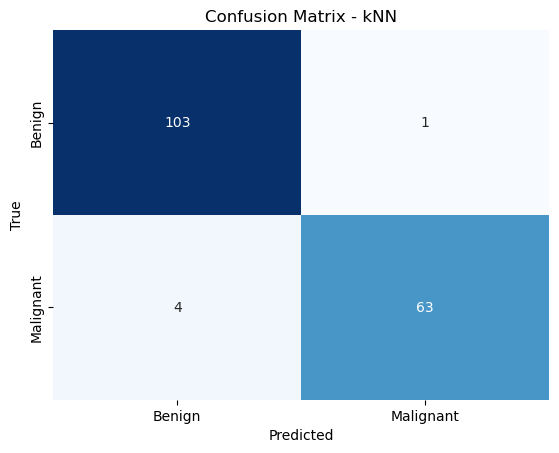


Metrics for kNN:
Accuracy: 0.97
Precision: 0.98
Recall: 0.94
F1-Score: 0.96


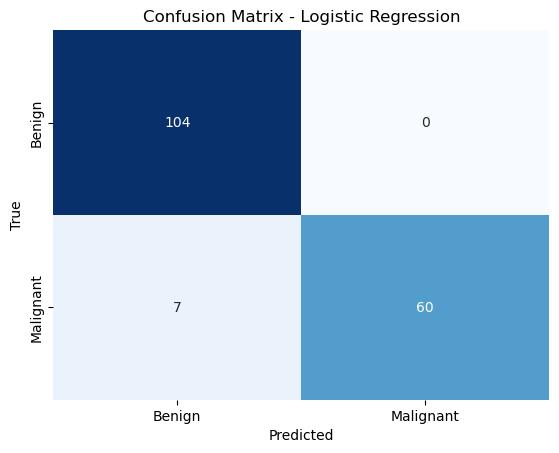


Metrics for Logistic Regression:
Accuracy: 0.96
Precision: 1.00
Recall: 0.90
F1-Score: 0.94


In [14]:
#Knn model
knn_classifier = KNeighborsClassifier(n_neighbors=best_k, p=best_p)
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)

#Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

# Function to calculate and display metrics
def display_metrics(y_true, y_pred, model_name):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Accuracy, Precision, Recall, F1-Score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

# Display metrics for kNN model
display_metrics(y_test, knn_pred, 'kNN')

# Display metrics for Logistic Regression model
display_metrics(y_test, logreg_pred, 'Logistic Regression')

### 5.2. Precision-Recall Curves

Evaluate the Precision-Recall curves for both models:
- Plot and analyze the curves

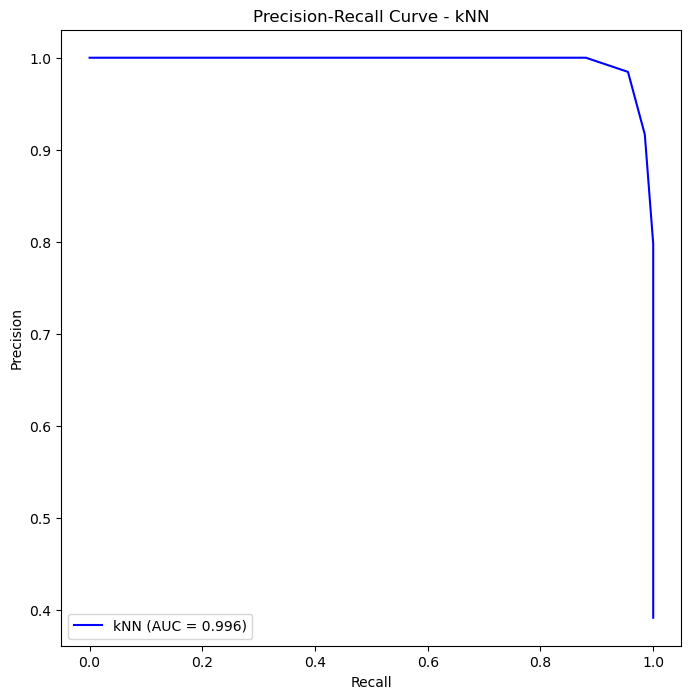

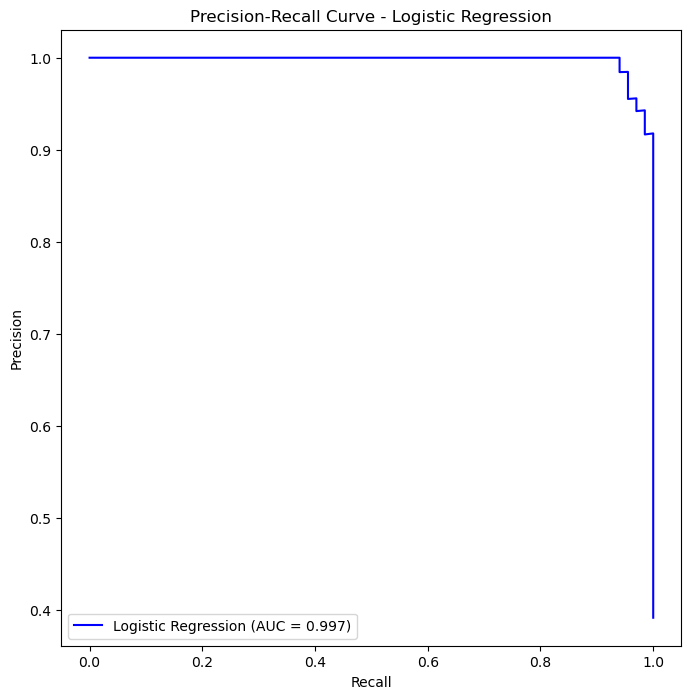

In [30]:
# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    area_under_curve = auc(recall, precision)

    plt.figure(figsize=(8, 8))
    plt.plot(recall, precision, label=f'{model_name} (AUC = {area_under_curve:.3f})', color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.show()
# Get decision function scores for both models
knn_scores = knn_classifier.predict_proba(X_test)[:, 1]  # Assuming kNN has predict_proba method
logreg_scores = logreg_model.predict_proba(X_test)[:, 1]

# Plot Precision-Recall curve for kNN
plot_precision_recall_curve(y_test, knn_scores, 'kNN')

# Plot Precision-Recall curve for Logistic Regression
plot_precision_recall_curve(y_test, logreg_scores, 'Logistic Regression')

**The Area Under the Curve (AUC) is a metric used to assess the performance of a classification model based on its Receiver Operating Characteristic (ROC) curve. A higher AUC generally indicates better discrimination between classes.**

**- AUC for kNN (0.996):**

- An AUC of 0.996 indicates that the kNN model has excellent discrimination ability. The ROC curve for kNN likely shows a steep rise, suggesting high true positive rates and low false positive rates across various thresholds.

**- AUC for Logistic Regression (0.997):**

- An AUC of 0.997 for the Logistic Regression model is also excellent. This suggests that the model performs exceptionally well in distinguishing between benign and malignant cases. The ROC curve for logistic regression likely shows a similar high true positive rate and low false positive rate.

### 5.3. Choose an appropriate metric to evaulate the models. Compare the models and discuss why you chose the metric.

##### Why I chose the F1 score
- I chose the F1 score to evaluate models on the Breast Cancer Wisconsin dataset due to its effectiveness in handling imbalanced class distributions, which are common in medical datasets like breast cancer diagnosis. The F1 score strikes a balance between precision and recall, making it well-suited for scenarios where both false positives and false negatives have significant implications. In breast cancer diagnosis, it is crucial to minimize both the risk of misclassifying benign cases as malignant (false positives) and missing potentially malignant cases (false negatives). The F1 score provides a comprehensive assessment of a model's performance, particularly in situations where achieving a harmonious trade-off between precision and recall is paramount for reliable diagnostic outcomes.

###### Comparison of the models
**kNN Model (F1 = 0.96):**

- The kNN model achieved a high F1 score of 0.96, indicating strong performance in terms of precision and recall. This means the model is effective in correctly identifying both benign and malignant cases while minimizing false positives and false negatives.

**Logistic Regression Model (F1 = 0.94):**

- The Logistic Regression model achieved a slightly lower F1 score of 0.94 compared to kNN. While still a high score, the model may have a slightly different trade-off between precision and recall compared to the kNN model.




